# **Obesity Levels Classification**

In [ ]:
import io
from google.colab import files

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

In [ ]:
data_to_load = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:
dataset=pd.read_csv(io.BytesIO(data_to_load['ObesityDataSet_raw_and_data_sinthetic.csv']))
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train,test=train_test_split(dataset,test_size=0.30,random_state=50)

## **General Analysis:**

## **Analyze by describing data :**

#### **Which features are available in the dataset?**

In [ ]:
print(train.columns.values)

['Gender' 'Age' 'Height' 'Weight' 'family_history_with_overweight' 'FAVC'
 'FCVC' 'NCP' 'CAEC' 'SMOKE' 'CH2O' 'SCC' 'FAF' 'TUE' 'CALC' 'MTRANS'
 'NObeyesdad']


#### **Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: 
- Gender
- family_history_with_overweight
- FAVC wich is the consumption of high caloric food
- SMOKE
- SCC
- MTRANS wich is the mode of transport

Ordinal:
- FCVC which represents the frequency of consumption of vegetables
- CAEC which is the consumption of food between meals
- CACL which is how often the person drink alcohol
- NObeyesdad which is the obesity level

Interval-based:
- CH20 which is how much water drink per day
- FAF which is the the physical activity frequency 
- TUE which the time using technology devices

#### **Which features are numerical?**

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continuous:
- Age
- Height
- Weight

Discrete :
- NCP which is the number of meal per day


In [ ]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 828 to 1712
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1477 non-null   object 
 1   Age                             1477 non-null   float64
 2   Height                          1477 non-null   float64
 3   Weight                          1477 non-null   float64
 4   family_history_with_overweight  1477 non-null   object 
 5   FAVC                            1477 non-null   object 
 6   FCVC                            1477 non-null   float64
 7   NCP                             1477 non-null   float64
 8   CAEC                            1477 non-null   object 
 9   SMOKE                           1477 non-null   object 
 10  CH2O                            1477 non-null   float64
 11  SCC                             1477 non-null   object 
 12  FAF                             

Let's check if there are missing data

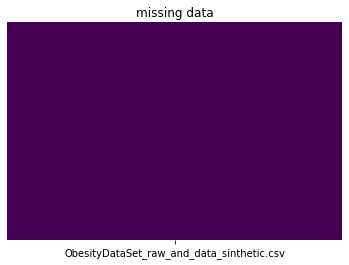

In [ ]:
df = pd.DataFrame([data_to_load])
df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()

No ! 

#### **Which features contain blank, null or empty values?**

There is no empty values in both train set and test set.

### **Statistical Analysis** 

In [ ]:
train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.263569,1.700189,85.981941,2.411594,2.680196,2.004432,1.019387,0.667327
std,6.350600,0.093711,26.178438,0.534609,0.789612,0.614714,0.857747,0.615372
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.865895,1.629010,65.000000,2.000000,2.625942,1.560064,0.118271,0.000000
50%,22.717249,1.700000,82.403076,2.341999,3.000000,2.000000,1.000000,0.639561
75%,26.000000,1.769499,105.696358,3.000000,3.000000,2.472964,1.704640,1.000000
max,61.000000,1.975663,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


- Samples are mostly young : the mean is about 24 years old ans the median is about 23 years old.
- The average height is about 1m70.
- The average weight is about 85 kg.
- The first quartile of FCVC is 2 which means that 75% of the sample eat vegetables "sometimes" or "usually".
- The first quartile of NCP is about 2.6 which means that less than 25% of the sample eat one or two meals per day. The third quartile is 3 which means that less than 25% of the sample eat 4 meals per day. The average is 2.6 meals.
- The average of CH20 is about 2 which means that the average consumption of water is 3 liters per day. Less than 25% drink between 1 and 2 liters per day. Less than 75% drink more than 3 liters per days. 
- The average of FAF is about 1 which means that the average frequency of physical activity is about 1 or 2 days.
- More than 50% of the sample use their technological devices during 0 and 2 hours. Less than 50% use them more than 5 hours.

In [ ]:
train.describe(include="O")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,1477,1477,1477,1477,1477,1477,1477,1477,1477
unique,2,2,2,4,2,2,4,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,746,1202,1299,1223,1447,1414,966,1112,247


In [ ]:
print(train[["Gender"]].value_counts())
print('-'*40)
print(train[["Gender"]].value_counts()/train.shape[0]*100)

Gender
Female    746
Male      731
dtype: int64
----------------------------------------
Gender
Female    50.507786
Male      49.492214
dtype: float64


- There is more woman than man. However the proportions are quiet the same.
- More than 80% of the sample have family history with overweight.
- More than 87% of the sample eat high caloric food frequently.
- More than 95% of the sample do not smoke.
- More than 95% of the sample do not monitor the calories they eat daily.

In [ ]:
print("Total number of people who eat between meals :", train[["CAEC"]].value_counts())
print('-'*40)
print("Proportion of people who eat between meals :",train[["CAEC"]].value_counts()/train.shape[0]*100)

Total number of people who eat between meals : CAEC      
Sometimes     1223
Frequently     182
no              36
Always          36
dtype: int64
----------------------------------------
Proportion of people who eat between meals : CAEC      
Sometimes     82.802979
Frequently    12.322275
no             2.437373
Always         2.437373
dtype: float64


In [ ]:
print("Total number of people who smoke :", train[["SMOKE"]].value_counts())
print('-'*40)
print("Proportion of people who smoke :",train[["SMOKE"]].value_counts()/train.shape[0]*100)

Total number of people who smoke : SMOKE
no       1447
yes        30
dtype: int64
----------------------------------------
Proportion of people who smoke : SMOKE
no       97.968856
yes       2.031144
dtype: float64


More than 82% of the sample eat sometimes between meals. Less than 5% eat always or never between meal.

In [ ]:
print("Total number of people who drink alcohol :", train[["CALC"]].value_counts())
print('-'*40)
print("Proportion of people who drink alcohol :",train[["CALC"]].value_counts()/train.shape[0]*100)

Total number of people who drink alcohol : CALC      
Sometimes     966
no            458
Frequently     52
Always          1
dtype: int64
----------------------------------------
Proportion of people who drink alcohol : CALC      
Sometimes     65.402844
no            31.008802
Frequently     3.520650
Always         0.067705
dtype: float64


31% of the sample do not drink alcohol. Less than 4% frequently or always drink alcohol.

In [ ]:
print("Total number of people according to their means of transport",train[["MTRANS"]].value_counts())
print('-'*40)
print("Proportion of people according to their means of transport",train[["MTRANS"]].value_counts()/train.shape[0]*100)

Total number of people according to their means of transport MTRANS               
Public_Transportation    1112
Automobile                316
Walking                    37
Motorbike                   6
Bike                        6
dtype: int64
----------------------------------------
Proportion of people according to their means of transport MTRANS               
Public_Transportation    75.287745
Automobile               21.394719
Walking                   2.505078
Motorbike                 0.406229
Bike                      0.406229
dtype: float64


75% of the sample use public transportation. Less than 1% of the sample use motorbike or bike. Less than 4% of the sample walk or use motorbike or bike.

In [ ]:
print(train[["NObeyesdad"]].value_counts())
print('-'*40)
print(train[["NObeyesdad"]].value_counts()/train.shape[0]*100)

NObeyesdad         
Obesity_Type_I         247
Obesity_Type_III       225
Overweight_Level_II    208
Overweight_Level_I     204
Normal_Weight          204
Insufficient_Weight    195
Obesity_Type_II        194
dtype: int64
----------------------------------------
NObeyesdad         
Obesity_Type_I         16.723087
Obesity_Type_III       15.233582
Overweight_Level_II    14.082600
Overweight_Level_I     13.811781
Normal_Weight          13.811781
Insufficient_Weight    13.202437
Obesity_Type_II        13.134733
dtype: float64


The proportion of the categories of the response variable is quite the same.

### **Assumtions based on data analysis**

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### **Correcting** :
- Smokers feature may be drop from our analysis as less than 3% of the sample smoke.
- CACL feature may be transform to a binary feature as less than 4% of the answers are "frequently" or "always". 
- Mtrans may be dropped because it does not contribute to the response.
- SCC should be dropped because it does not contribute to the response.

## **Analyze the correlation between the feature "Height" and the response :**

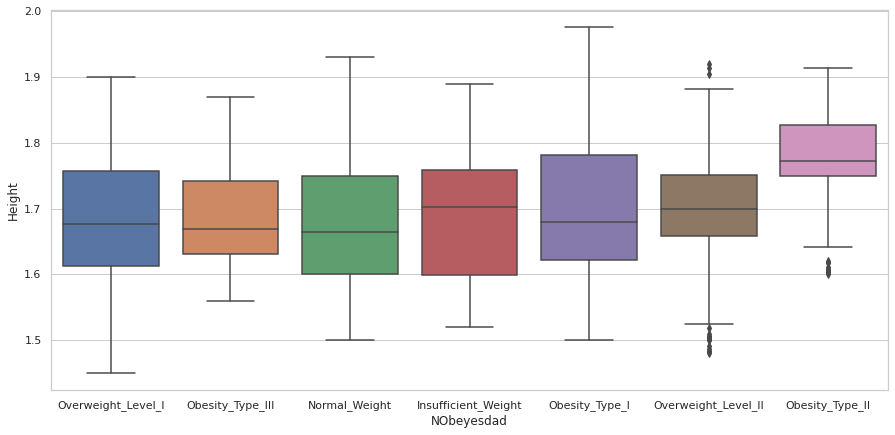

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=train[["NObeyesdad","Height"]],x="NObeyesdad",y="Height")

It seems that the "Height" feature dos not contribute much to the response.
Besides we observe some outliers, let's check them.

In [ ]:
train[((train["NObeyesdad"]=="Overweight_Level_II") & (train["Height"]>1.9))]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1066,Male,31.398281,1.919543,101.544589,yes,yes,2.0,1.005391,Sometimes,no,2.001936,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
981,Male,32.774488,1.913241,101.482054,yes,yes,2.0,2.110937,Sometimes,no,2.175632,no,1.0,0.0,Sometimes,Walking,Overweight_Level_II
1126,Male,32.787101,1.903832,99.812443,yes,yes,2.0,1.863012,Sometimes,no,2.196471,no,1.0,0.0,Sometimes,Automobile,Overweight_Level_II


In [ ]:
print("Mean weight of people with overweight level II : ")
print(train.loc[train["NObeyesdad"]=="Overweight_Level_II","Weight"].mean())

Mean weight of people with overweight level II : 
81.63596653846152


The outliers which have a height greater than the others, also have a weight greater than the others as we can see in the following graph.

Let's check if there is any kind of relationship between these two features. But before that let's check if the weight contribute to the response variable.


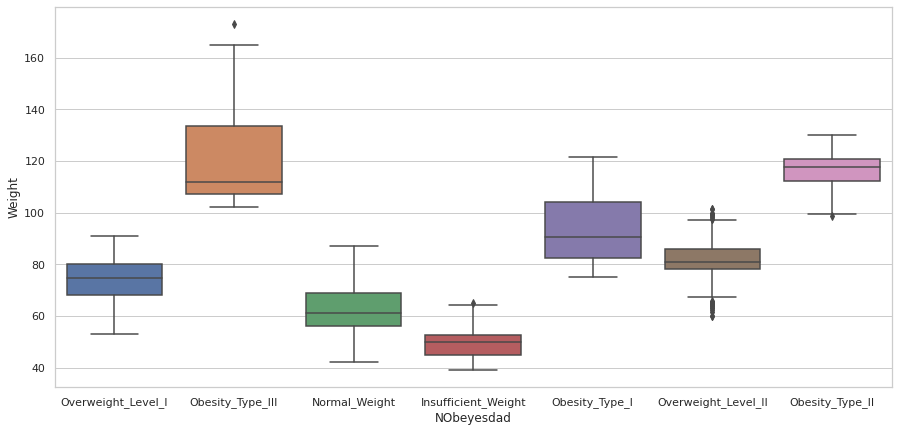

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=train[["NObeyesdad","Weight"]],x="NObeyesdad",y="Weight")

The feature "Weight" seems to be very correlate with the response. Each obesity level has its own range of weight, well seperated from the others.

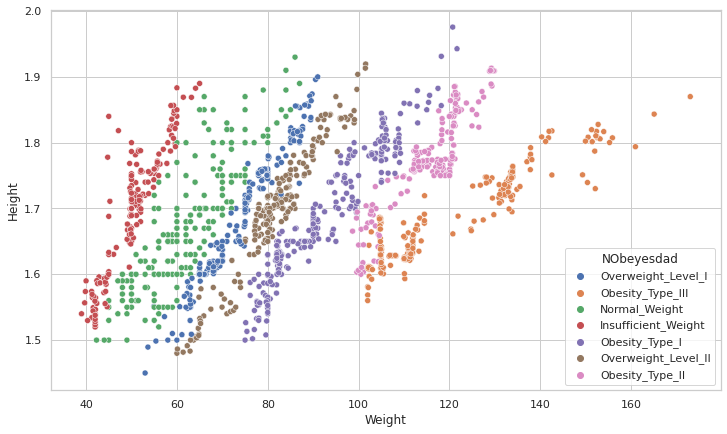

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="Weight", y="Height", hue="NObeyesdad",data=train)

- The weight increase when the height increase which is quite logical. There is definitively a high correlation between these two features. 

- We also notice that the response variable can be well defined by these two features. The combination of these two features could be very interesting. 

- The boundaries between the categories of the response variable are well defined. Except for the categories "Obesity_Type_II" and "Obesity_Type_III" and the categories "Overweight_Level_I" and "Overweight_Level_II".

So, we can think of a new feature wich combine both features "Height" and "Weight". This feature is the BMI measure, the Body Mass Index.

In [ ]:
train["BMI"]=train["Weight"]/(train["Height"]**2)
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
828,Female,21.987341,1.730182,78.554440,yes,yes,2.293705,1.000000,Sometimes,no,2.000000,no,2.063943,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,26.241409
1813,Female,21.012450,1.747773,127.902844,yes,yes,3.000000,3.000000,Sometimes,no,1.705218,no,0.390937,0.998646,Sometimes,Public_Transportation,Obesity_Type_III,41.870693
180,Female,18.000000,1.580000,48.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,no,Public_Transportation,Normal_Weight,19.227688
692,Male,18.000000,1.767058,51.132809,yes,yes,2.708965,3.000000,Sometimes,no,1.873004,no,1.217180,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,16.375631
572,Female,19.084967,1.768435,49.597765,no,yes,3.000000,3.725797,Sometimes,no,1.191401,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,15.859296


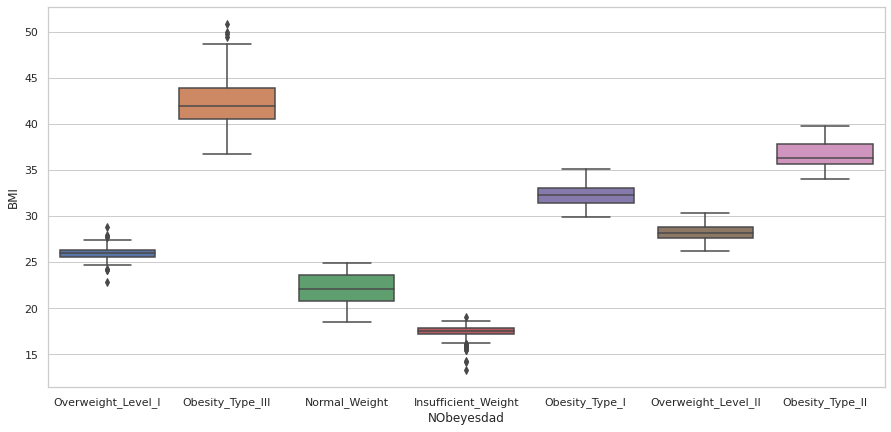

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=train[["NObeyesdad","BMI"]],x="NObeyesdad",y="BMI")

These feature seems very correlated to the variable response. Much more than the "Height" and the "Weight".

Some talk about the outliers:
- The outliers in the category "Obesity_Type_III" represent people with an BMI superior to 48. These people are already classify in the last category. 
- The lower outliers in the category "Insufficient_Weight" represent people with the lowest BMI. These people are already classify in the first category. 
- Some outliers are quite surprising. For example, the upper outlier in the category "Insufficient_Weight". We want to understand why this person is in this category rather than in the "Normal_Weight" category.

In [ ]:
train[((train["NObeyesdad"]=="Insufficient_Weight") & (train["BMI"]>19))]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
549,Female,29.970445,1.610863,49.516027,yes,yes,2.059138,3.904858,Frequently,no,2.0,no,0.821977,0.0,no,Public_Transportation,Insufficient_Weight,19.082206


In [ ]:
train[((train["NObeyesdad"]=="Overweight_Level_I") & (train["BMI"]<24.18))]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
784,Female,16.941489,1.551288,54.932420,no,yes,1.753750,1.296156,Sometimes,no,2.0,yes,0.110174,1.944675,Sometimes,Public_Transportation,Overweight_Level_I,22.826739
951,Female,17.420269,1.489409,53.620604,no,yes,1.836554,1.865238,Sometimes,no,2.0,yes,0.320209,1.969507,Sometimes,Public_Transportation,Overweight_Level_I,24.171508


In [ ]:
train[((train["NObeyesdad"]=="Overweight_Level_I") & (train["BMI"]>27.5))]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
756,Female,33.700749,1.642971,74.803157,yes,no,3.000000,1.146052,Sometimes,no,1.074048,no,0.679935,0.000000,Sometimes,Automobile,Overweight_Level_I,27.711506
902,Female,38.939448,1.738321,86.934846,no,yes,2.843709,3.058539,Sometimes,no,1.130079,no,2.834373,0.044954,Sometimes,Automobile,Overweight_Level_I,28.769607
825,Female,37.455752,1.508908,63.183846,yes,yes,2.048582,1.047197,Sometimes,no,2.000000,no,0.151360,0.225960,Sometimes,Automobile,Overweight_Level_I,27.751121
751,Female,41.823567,1.721854,82.919584,no,yes,2.816460,3.363130,Sometimes,no,2.722063,no,3.000000,0.265790,Sometimes,Automobile,Overweight_Level_I,27.968197


##### **Assumptions**

The feature "Gender" may explain these outliers. Indeed all these outliers are women.
Let's check is gender is important.

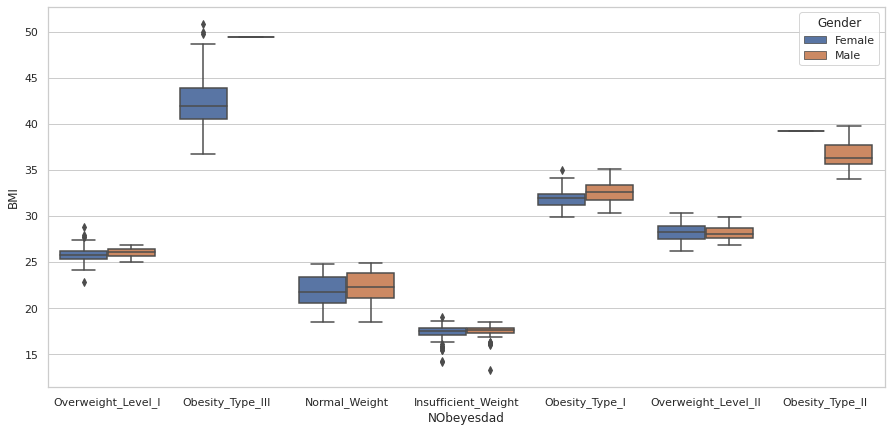

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="NObeyesdad", y="BMI", hue="Gender", data=train)

At first view the feature "Gender" does not seem very relevant. The mean of each group is quite the same. We perform a statistical test in order to have a better idea of the relationship between this feature and the response variable.

In [ ]:
contingency_table=pd.crosstab(train["NObeyesdad"],train["Gender"])
print(contingency_table)
print('-'*40)
print(pd.crosstab(train["NObeyesdad"],train["Gender"],normalize="index")*100)
print('-'*40)
print(chi2_contingency(contingency_table))

Gender               Female  Male
NObeyesdad                       
Insufficient_Weight     123    72
Normal_Weight            97   107
Obesity_Type_I          108   139
Obesity_Type_II           1   193
Obesity_Type_III        224     1
Overweight_Level_I      110    94
Overweight_Level_II      83   125
----------------------------------------
Gender                  Female       Male
NObeyesdad                               
Insufficient_Weight  63.076923  36.923077
Normal_Weight        47.549020  52.450980
Obesity_Type_I       43.724696  56.275304
Obesity_Type_II       0.515464  99.484536
Obesity_Type_III     99.555556   0.444444
Overweight_Level_I   53.921569  46.078431
Overweight_Level_II  39.903846  60.096154
----------------------------------------
(438.3862921653869, 1.5495754958567056e-91, 6, array([[ 98.4901828 ,  96.5098172 ],
       [103.03588355, 100.96411645],
       [124.75423155, 122.24576845],
       [ 97.98510494,  96.01489506],
       [113.64251862, 111.35748138],
  

- There is only one woman in the category "Obesity_Type_II" and one man in the category "Obesity_Type_III". These data are not representative of the real world. According to studies, the parts of woman and man with "Obesity_level_III" is quite the same in France.
- The previous point might be a problem in a chi-2 test. Indeed the relation between this feature and the response varible might be higher than it is really.
- According to the chi-2 test, the feature "Gender" and the response are pretty correlated. Indeed the p-value is inferior to 0.05 so we reject the null hypothesis.

### **Conclusions based on the previous analysis**

- We decide to retain the "BMI" feature.
- We decide to retain the "Gender" feature because the chi-2 test was great and because we believe that the sex of a person is used for the interpretration of the BMI. So this feature is relevant to predict the level of obesity.
- We should drop the "Height" and "Weight" features.

In [ ]:
test["BMI"]=test["Weight"]/(test["Height"]**2)

train=train.drop(columns=["Height","Weight"])
test=test.drop(columns=["Height","Weight"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## **Analyze the correlation between the feature "Age" and the response :**

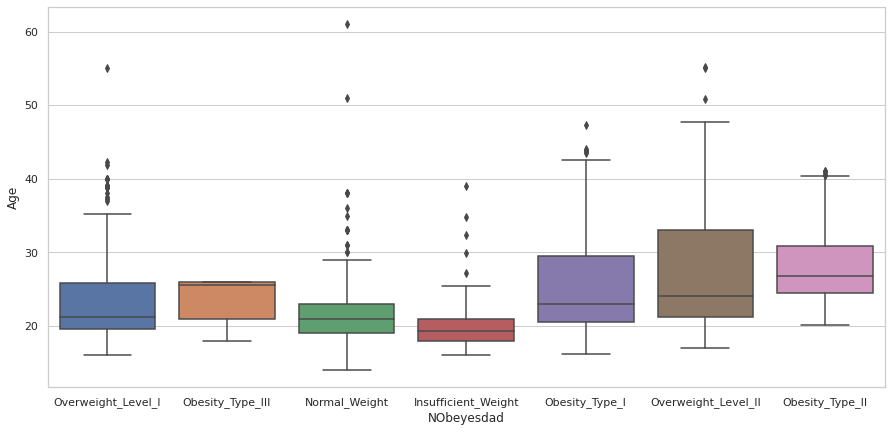

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=train[["NObeyesdad","Age"]],x="NObeyesdad",y="Age")

- "Insufficient_Weight" seems to affect young people. The mean of this category is the lower (mean < 20 years old).
- The mean of the category "Obesity_Type_II" is greater than 25 years old.

We used the following graph to have a better understanding of this feature.

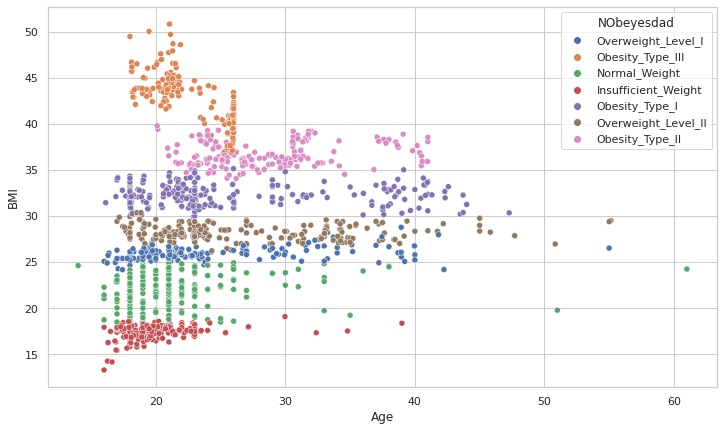

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="Age", y="BMI", hue="NObeyesdad",data=train)

We confirm the previous analysis:
- "Insuffcient_Weight" affects more the young people.
- "Obesity_Type_II" does not affect young people (< 25 years old).

We complete the previous analysis:
- "Obesity_Type_III" affects more the young people.

### **Conclusions based on the previous analysis**

We retain this feature.

## **Analyze the correlation between the eating habits and the response :**

### **Water consumption :**

In [ ]:
pd.crosstab(train["NObeyesdad"],train["CH2O"])

CH2O,1.000000,1.000536,1.000544,1.001307,1.001995,1.002292,1.003563,1.003636,1.005367,1.005727,1.005864,1.006643,1.013780,1.014634,1.015249,1.015672,1.015677,1.016585,1.016968,1.017006,1.019684,1.020313,1.023328,1.025275,1.026143,1.026729,1.028538,1.029241,1.029703,1.029798,1.030501,1.031354,1.031701,1.032834,1.045586,1.046254,1.050564,1.051735,1.055019,1.056680,...,2.893117,2.894678,2.896088,2.902682,2.905450,2.924594,2.925029,2.926995,2.929123,2.931438,2.939492,2.939847,2.943097,2.949356,2.949419,2.952506,2.953110,2.955075,2.956548,2.957821,2.962371,2.967064,2.971557,2.972426,2.973729,2.975528,2.976177,2.976672,2.977516,2.978465,2.981604,2.984153,2.984323,2.987406,2.987718,2.989389,2.991671,2.993448,2.994515,3.000000
NObeyesdad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Insufficient_Weight,23,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,7
Normal_Weight,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26
Obesity_Type_I,14,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33
Obesity_Type_II,24,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
Obesity_Type_III,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1
Overweight_Level_I,16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25
Overweight_Level_II,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,17


In [ ]:
train[["CH2O","NObeyesdad"]].groupby("NObeyesdad").mean()

,CH2O
NObeyesdad,
Insufficient_Weight,1.870205
Normal_Weight,1.823529
Obesity_Type_I,2.130228
Obesity_Type_II,1.889148
Obesity_Type_III,2.187173
Overweight_Level_I,2.059744
Overweight_Level_II,2.013910


Seems like overweight people consume more water.

In [ ]:
def CH2O_transform_1(value):
  if 1.5<value<2.2:
    return 2
  if value>=2.2:
    return 3
  else:
    return 1

train["CH2O_1"]=train["CH2O"].apply(CH2O_transform_1)

In [ ]:
pd.crosstab(train["NObeyesdad"],train["CH2O_1"])

CH2O_1,1,2,3
NObeyesdad,,,
Insufficient_Weight,63,82,50
Normal_Weight,62,116,26
Obesity_Type_I,45,96,106
Obesity_Type_II,51,103,40
Obesity_Type_III,43,45,137
Overweight_Level_I,45,87,72
Overweight_Level_II,35,119,54


In [ ]:
train = train.drop(columns="CH2O_1")

### **Alcohol consumption :**

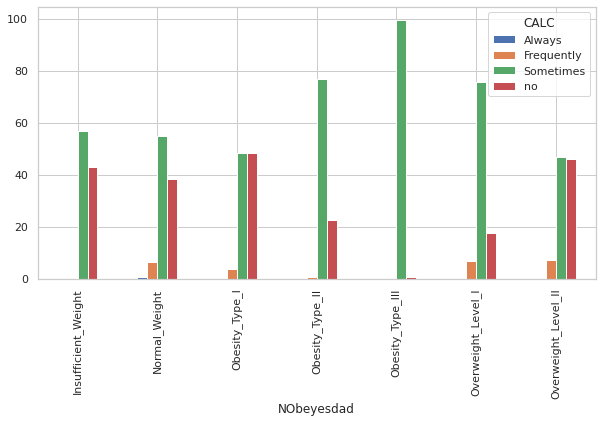

In [ ]:
table_CACL=pd.crosstab(train["NObeyesdad"],train["CALC"],normalize="index")*100
table_CACL.plot.bar(figsize=(10,5))

The categories "Always" and "Frequently" do not seem relevant because it represents less than 4% of the answers. Let's try to simplify these feature with categories "Yes" and "No".

In [ ]:
def CALC_transform(value):
  if value=="no":
    return 0
  else:
    return 1

train["CALC_1"]=train["CALC"].apply(CALC_transform)

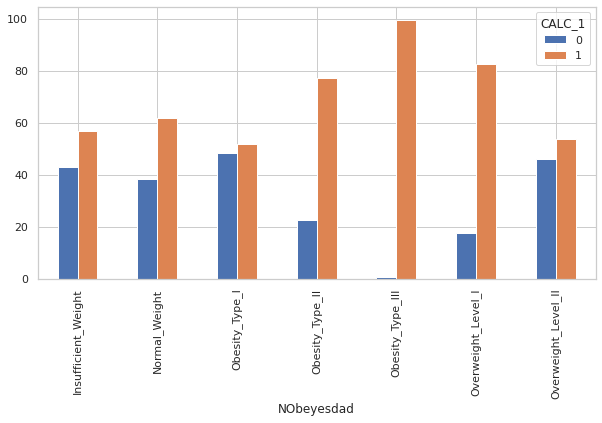

In [ ]:
table_CACL1=pd.crosstab(train["NObeyesdad"],train["CALC_1"],normalize="index")*100
table_CACL1.plot.bar(figsize=(10,5))

### **High caloric food consumption :**

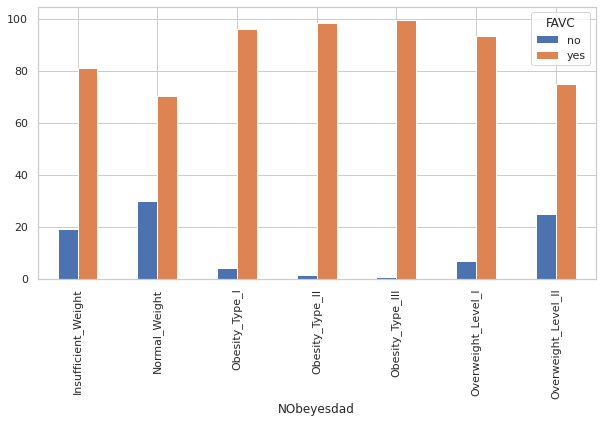

In [ ]:
table_FAVC=pd.crosstab(train["NObeyesdad"],train["FAVC"],normalize="index")*100
table_FAVC.plot.bar(figsize=(10,5))

### **Vegetables consumption :**

77% of the data was generated synthetically in this dataset. This is why some features which normaly take discrete values, take continious values.

Before further analysis we should restore the variable to is original format. FCVC is a ordinal cartegorical variable with three categories:
- 1 for "Never"
- 2 for "Sometimes"
- 3 for "Always"

In [ ]:
def FCVC_transform_1(value):
  if 1.5<value<2.5:
    return 1
  if value>=2.5:
    return 2
  else:
    return 0

train["FCVC_1"]=train["FCVC"].apply(FCVC_transform_1)

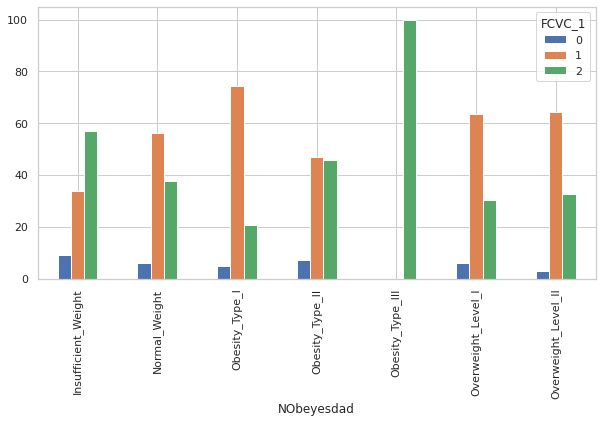

In [ ]:
table_FCVC1=pd.crosstab(train["NObeyesdad"],train["FCVC_1"],normalize="index")*100
table_FCVC1.plot.bar(figsize=(10,5))

#### **Conclusions :**
**Alcohol :**
- For each obesity level, the majority of the sample drinks alcohol. However the percentages are higher for the most severe type of obesity.

**High caloric food :**
- The same observation can be made about the consumption of high caloric food in the sample.

**Vegetables :**
- The feature "FCVC" does not seem relevant. Indeed less than 5% of the sample does not eat vegetables, and these 5% are equally distributed in each category of obesity. 
- It seems that 100% of the people with "Obesity_Type_III" eat vegetables. It is highly surprising. There might be some errors in the dataset.
- Except for "Obesity_Type_III" and "Obesity_Type_II", the link between the consumption of vegetables and the type of obesity is quite clear. 

#### **Assumption :**
- The feature "FAVC" could be improve by modifying the categories ( from "yes"/"no" to "No"/"Sometimes"/"Usually").
- In order to make these features more relevant, could we combine them to create the feature "Bad_consumption_habits"?

This feature follows the rules:
- +1 if the person drinks alcohol
- +1 if the person eats high caloric food 
- +1 if the person never eats vegetables or eats vegetables sometimes.




In [ ]:
def FAVC_transform(value):
  if value=="yes":
    return 1
  else:
    return 0

train["FAVC_1"]=train["FAVC"].apply(FAVC_transform)

In [ ]:
def FCVC_transform_2(value):
  if value==0:
    return 1
  else:
    return 0

train["FCVC_2"]=train["FCVC"].apply(FCVC_transform_2)

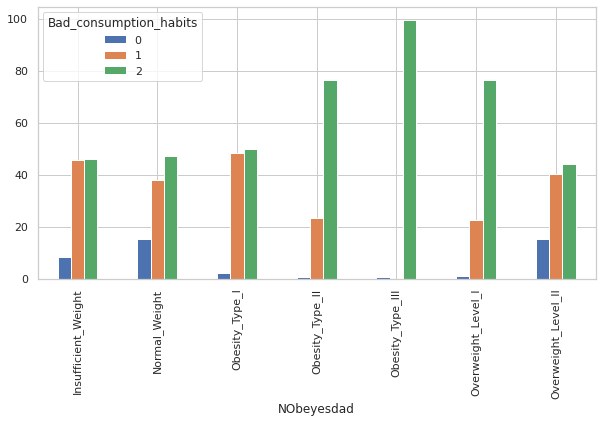

In [ ]:
train["Bad_consumption_habits"]=train["FAVC_1"]+train["FCVC_2"]+train["CALC_1"]
table_BadHabits=pd.crosstab(train["NObeyesdad"],train["Bad_consumption_habits"],normalize="index")*100
table_BadHabits.plot.bar(figsize=(10,5))

In [ ]:
table=pd.crosstab(train["NObeyesdad"],train["Bad_consumption_habits"])
print(chi2_contingency(table)[0:2])
print('-'*40)
table1=pd.crosstab(train["NObeyesdad"],train["FAVC"])
print(chi2_contingency(table1)[0:2])
print('-'*40)
table2=pd.crosstab(train["NObeyesdad"],train["FCVC_1"])
print(chi2_contingency(table2)[0:2])
print('-'*40)
table3=pd.crosstab(train["NObeyesdad"],train["CALC_1"])
print(chi2_contingency(table3)[0:2])

(316.1621976584207, 1.8851092099982558e-60)
----------------------------------------
(171.95451828222346, 1.731368972105663e-34)
----------------------------------------
(400.1363677920432, 3.5410800937560313e-78)
----------------------------------------
(196.15576153141149, 1.2482030735712486e-39)


#### **Conclusions :**
- According to the chi-square test, the feature "Bad_consumption_habits" is less correlate to the response than the feature "FCVC_1". However it still much more relevant than the features "CALC_1" and "FAVC_1".
- We retain the feature "FCVC_1 for our analysis.
- We drop the features "FAVC", "CALC_1", "CALC", "FCVC_2" and "FCVC".
- We must modify the feature "Bad_consumption_habits".

In [ ]:
train["Bad_consumption_habits"]=train["FAVC_1"]+train["CALC_1"]
table=pd.crosstab(train["NObeyesdad"],train["Bad_consumption_habits"])
print(chi2_contingency(table)[0:2])

(316.1621976584207, 1.8851092099982558e-60)


#### **Conclusions :**
- We retain this new version of the feature "Bad_consumption_habits".

### **Between meals consumption :**

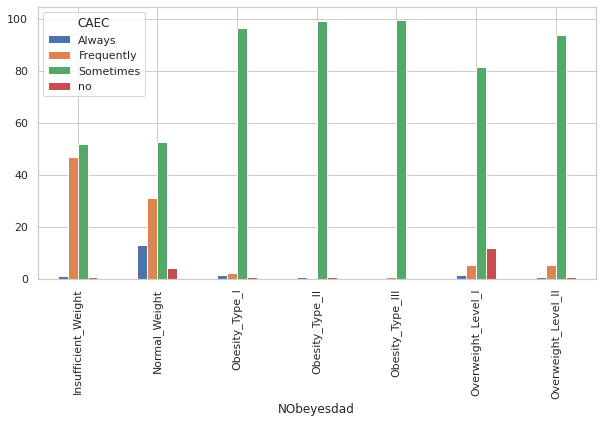

In [ ]:
table_CAEC=pd.crosstab(train["NObeyesdad"],train["CAEC"],normalize="index")*100
table_CAEC.plot.bar(figsize=(10,5))

- Less than 50% of the people from categories "normal weight" and "insufficient weight" declare to sometimes eat food between meal. For the others categories this percentage is higher than 80%. 
- Surprisingly people who have an insuficient weight eat more frequently between meals than people with overweight. Perhaps people with overweight try to minimize the situation by answering "sometimes" rather than "frequently". And people with an insuficient wieght do the exact opposite.
- Let's try to simplify this feature with "Yes"/"No" categories.


In [ ]:
def CAEC_transform(value):
  if value=="no":
    return 0
  else:
    return 1

train["CAEC_1"]=train["CAEC"].apply(CAEC_transform)

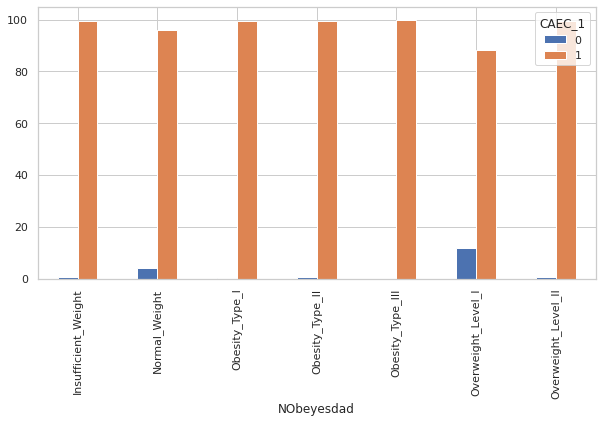

In [ ]:
table_CAEC_1=pd.crosstab(train["NObeyesdad"],train["CAEC_1"],normalize="index")*100
table_CAEC_1.plot.bar(figsize=(10,5))

We clearly lose informations so we do not retain this transformation.

In [ ]:
chi2_contingency(pd.crosstab(train["NObeyesdad"],train["CAEC"]))

(596.5562599779912,
 4.599080338823758e-115,
 18,
 array([[  4.75287745,  24.02843602, 161.46580907,   4.75287745],
        [  4.97224103,  25.13744076, 168.91807718,   4.97224103],
        [  6.02031144,  30.43601896, 204.52335816,   6.02031144],
        [  4.72850372,  23.90521327, 160.63777928,   4.72850372],
        [  5.48408937,  27.72511848, 186.30670278,   5.48408937],
        [  4.97224103,  25.13744076, 168.91807718,   4.97224103],
        [  5.06973595,  25.63033175, 172.23019634,   5.06973595]]))

#### **Conclusions :**
- We retain the feature with no transformation.

In [ ]:
train=train.drop(columns=["FAVC","FAVC_1","FCVC_2","FCVC","CALC","CALC_1","CAEC_1"])

test["FCVC_1"]=test["FCVC"].apply(FCVC_transform_1)

test["CALC_1"]=test["CALC"].apply(CALC_transform)
test["FAVC_1"]=test["FAVC"].apply(FAVC_transform)
test["Bad_consumption_habits"]=test["FAVC_1"]+test["CALC_1"]

test=test.drop(columns=["FAVC","FAVC_1","FCVC","CALC","CALC_1"])

## **Analyze the correlation between the feature "family_history_with_overweight" and the response :**

In [ ]:
pd.crosstab(train["NObeyesdad"],train["family_history_with_overweight"],normalize="index")*100

family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,52.820513,47.179487
Normal_Weight,47.058824,52.941176
Obesity_Type_I,2.429150,97.570850
Obesity_Type_II,0.000000,100.000000
Obesity_Type_III,0.000000,100.000000
Overweight_Level_I,28.921569,71.078431
Overweight_Level_II,5.288462,94.711538


#### **Conclusions :**
- People with a family history with overweight are more susceptible to develop some kind of obesity level.
- We decide to retain this feature.

## **Analyze of the physical activity :**

The feature "FAF" which is the frequency of physical activity. This features was first categorical with the following categories : 
- 0
- 1-2
- 2-4
- 4-5

Because of the fact that some data was generated, this feature is now discrete. 

In [ ]:
train[["FAF","NObeyesdad"]].groupby("NObeyesdad").mean()

,FAF
NObeyesdad,
Insufficient_Weight,1.249066
Normal_Weight,1.284314
Obesity_Type_I,0.976132
Obesity_Type_II,0.952608
Obesity_Type_III,0.667533
Overweight_Level_I,1.083314
Overweight_Level_II,0.975797


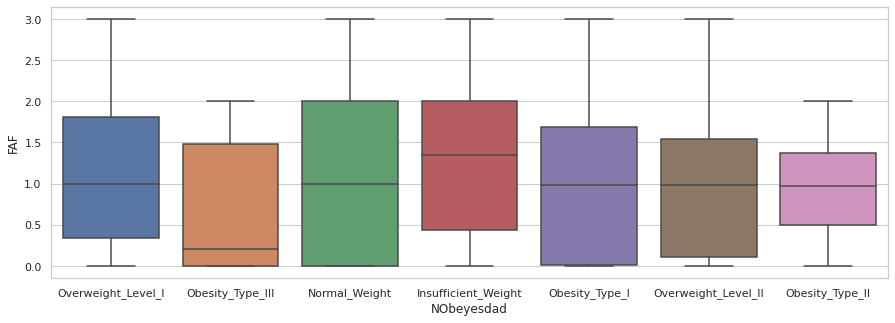

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="NObeyesdad",y="FAF",data=train)

- The people with severe obesity level practise less physical activity than the others. However the difference is quite minimal.

The feature "FAF" does not seem very much relevant. It's quite surprising because according to the scientific community, people who do not exercise regularly are more Susceptible to develop some kind of obesity.

Let's try to make this feature more relevant.

In [ ]:
def FAF_transformation(value):
  if value<1:
    return 0
  else:
    return 1

train["FAF_1"]=train["FAF"].apply(FAF_transformation)

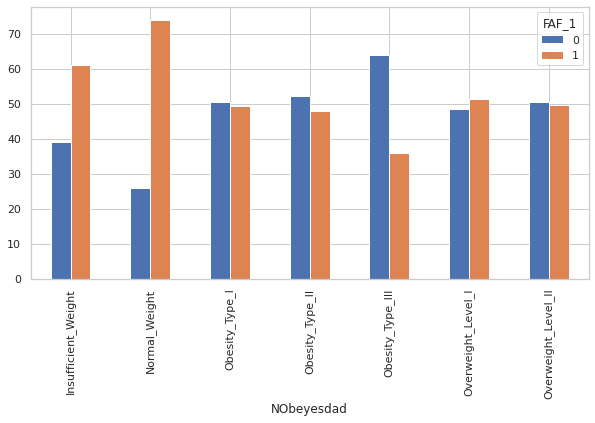

In [ ]:
table_FAF1=pd.crosstab(train["NObeyesdad"],train["FAF_1"],normalize="index")*100
table_FAF1.plot.bar(figsize=(10,5))

This new feature "FAF_1" take two values :
- 0 if the person do not make exercise.
- 1 if the person make exercise.

This feature is much relevant. We clearly see that people with a normal weight or an insufficient weight make more exercise than the others. People with severe obesity make less sport than the others.

According to the OMS, adults aged 18 to 45 should make exercice more than two days per week. The majory of the sample are in this range so we may improve the previous feature with this new information.

In [ ]:
def FAF_transformation_2(value):
  if value<2:
    return 0
  else:
    return 1

train["FAF_2"]=train["FAF"].apply(FAF_transformation_2)

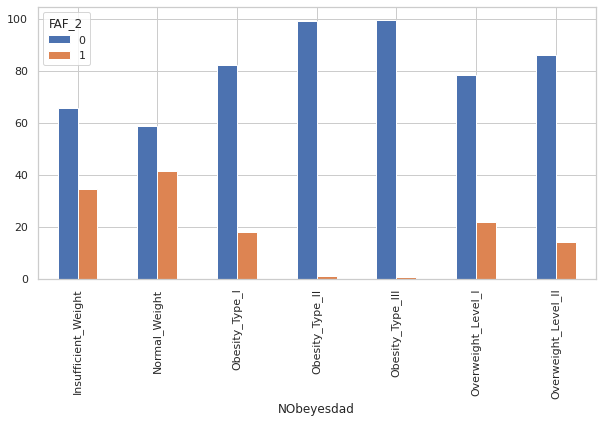

In [ ]:
table_FAF2=pd.crosstab(train["NObeyesdad"],train["FAF_2"],normalize="index")*100
table_FAF2.plot.bar(figsize=(10,5))

We clearly see a correlation between the physical activity and the obesity level.

In [ ]:
table=pd.crosstab(train["NObeyesdad"],train["FAF"])
print("Feature 'FAF'")
print(chi2_contingency(table)[0:2])
print('-'*40)
table=pd.crosstab(train["NObeyesdad"],train["FAF_1"])
print("Feature 'FAF_1'")
print(chi2_contingency(table)[0:2])
print('-'*40)
print("Feature 'FAF_2'")
table1=pd.crosstab(train["NObeyesdad"],train["FAF_2"])
print(chi2_contingency(table1)[0:2])

Feature 'FAF'
(5437.235881562082, 2.066028543126225e-05)
----------------------------------------
Feature 'FAF_1'
(71.51477264873198, 1.9986879747719286e-13)
----------------------------------------
Feature 'FAF_2'
(195.45589495180818, 1.7586785141842725e-39)


The feature "FAF_2" is much relevant. 

#### **Conclusions :**
- We drop the features "FAF" and "FAF_1".
- We retain the feature "FAF_2".

Let's have a look to the feature "MTRANS" which is also a part of the physical activity.

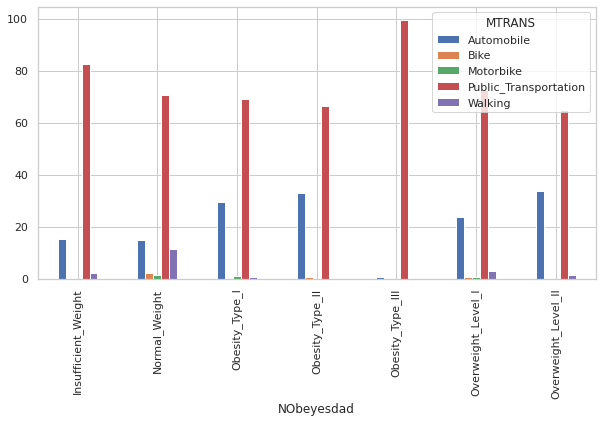

In [ ]:
(pd.crosstab(train["NObeyesdad"],train["MTRANS"],normalize="index")*100).plot.bar(figsize=(10,5))

- Most of the people who walk are people with a normal weight. The category "Walking" seems relevant to detect obesity level.
- The category "Public_Transportation" is not relevant because all the means are quite equals.
- The category "Automobile" shows that people with the most severe kind of obesity do not use automobile. It might be an useful information.
- Some categories are obvioulsy not relevant (Bike, Motorbike), we should drop them out in order to visualize better.

Let's try to transform this feature with these rules:
- 2 instead of "Bike" and "Walking" because these are low-energy physical activities.
- 1 instead of "Public-transportation" because this implies some walking.
- 0 instead of "Motorbike" and "Automobile" because these do not implies some kind of physical activity.

In [ ]:
def MTRANS_transformation(value):
  if value=="Bike" or value=="Walking":
    return 2
  if value=="Public_Transportation":
    return 1
  else:
    return 0

train["MTRANS_1"]=train["MTRANS"].apply(MTRANS_transformation)

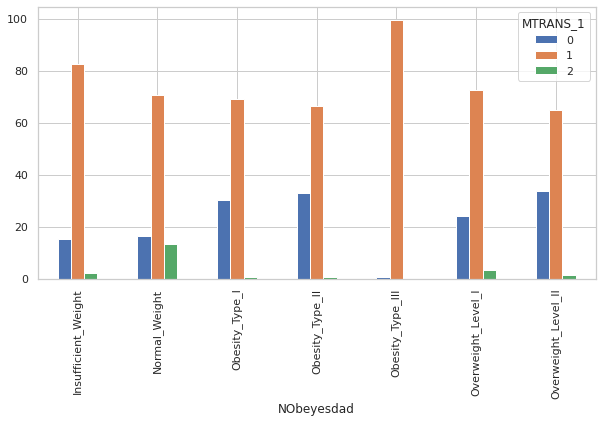

In [ ]:
table_MTRANS1=pd.crosstab(train["NObeyesdad"],train["MTRANS_1"],normalize="index")*100
table_MTRANS1.plot.bar(figsize=(10,5))

- People with overweight use more their car than the others.
- People with the most severe case of obesity do not use their car.
- People with a normal weight use more their bike or their feet.

Let's try something else. 

In [ ]:
def MTRANS_transformation2(value):
  if value=="Bike" or value=="Walking":
    return 1
  else:
    return 0

train["MTRANS_2"]=train["MTRANS"].apply(MTRANS_transformation2)

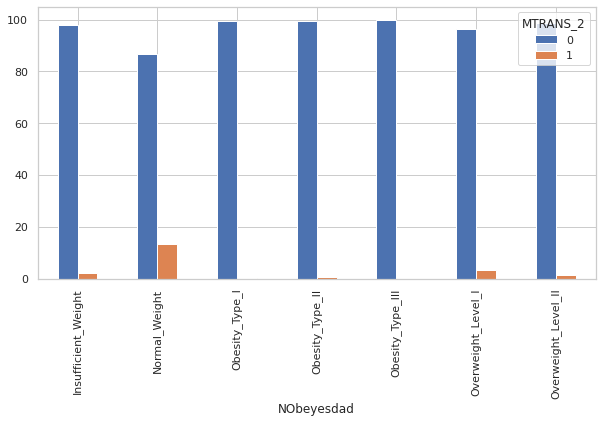

In [ ]:
table_MTRANS2=pd.crosstab(train["NObeyesdad"],train["MTRANS_2"],normalize="index")*100
table_MTRANS2.plot.bar(figsize=(10,5))

This transformation is worst because we lose two informations :
- People with overweight use more their car than the others.
- People with the most severe case of obesity do not use their car.

We believe the first transformation of this feature contains some information but not enough to be relevant by itself. It may be interesting to mix this feature with another. For example let's try to combine this feature with the feature "FAF". Both are about physical activity so it could be relevant.

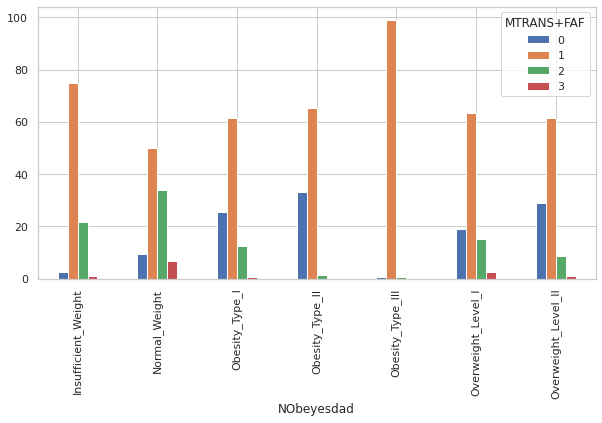

In [ ]:
train["MTRANS+FAF"]=train["MTRANS_1"]+train["FAF_2"]
(pd.crosstab(train["NObeyesdad"],train["MTRANS+FAF"],normalize="index")*100).plot.bar(figsize=(10,5))

In [ ]:
table=pd.crosstab(train["NObeyesdad"],train["FAF_2"])
print("Feature 'FAF_2'")
print(chi2_contingency(table)[0:2])
print('-'*40)
table0=pd.crosstab(train["NObeyesdad"],train["MTRANS"])
print("Feature 'MTRANS'")
print(chi2_contingency(table0)[0:2])
print('-'*40)
print("Feature 'MTRANS_1'")
table1=pd.crosstab(train["NObeyesdad"],train["MTRANS_1"])
print(chi2_contingency(table1)[0:2])
print('-'*40)
print("Feature 'MTRANS_2'")
table2=pd.crosstab(train["NObeyesdad"],train["MTRANS_2"])
print(chi2_contingency(table2)[0:2])
print('-'*40)
print("Feature 'FAF+MTRANS'")
table3=pd.crosstab(train["NObeyesdad"],train["MTRANS+FAF"])
print(chi2_contingency(table3)[0:2])

Feature 'FAF_2'
(195.45589495180818, 1.7586785141842725e-39)
----------------------------------------
Feature 'MTRANS'
(219.14887288566302, 1.9657901476576354e-33)
----------------------------------------
Feature 'MTRANS_1'
(205.5940970468042, 2.2801514320644566e-37)
----------------------------------------
Feature 'MTRANS_2'
(95.39501125449573, 2.2877208956495395e-18)
----------------------------------------
Feature 'FAF+MTRANS'
(344.3308936817243, 3.404715671261917e-62)


#### **Conclusion :**
- We drop the feature "MTRANS".
- We drop the feature "MTRANS_1".
- We drop the feature "FAF_2".
- We retain the feature "FAF+MTRANS"


In [ ]:
train=train.drop(columns=["MTRANS","MTRANS_1","MTRANS_2","FAF","FAF_1","FAF_2"])

test["MTRANS_1"]=test["MTRANS"].apply(MTRANS_transformation)
test["FAF_2"]=test["FAF"].apply(FAF_transformation_2)
test["MTRANS+FAF"]=test["MTRANS_1"]+test["FAF_2"]

test=test.drop(columns=["MTRANS","MTRANS_1","FAF","FAF_2"])

## **Analyze the correlation between the feature "SMOKE", "SCC" and the response :**

In [ ]:
print(pd.crosstab(train["NObeyesdad"],train["SMOKE"],normalize="index")*100)
print('-'*40)
print(pd.crosstab(train["NObeyesdad"],train["SCC"],normalize="index")*100)

SMOKE                        no       yes
NObeyesdad                               
Insufficient_Weight  100.000000  0.000000
Normal_Weight         94.117647  5.882353
Obesity_Type_I        97.975709  2.024291
Obesity_Type_II       95.360825  4.639175
Obesity_Type_III      99.555556  0.444444
Overweight_Level_I    99.509804  0.490196
Overweight_Level_II   99.038462  0.961538
----------------------------------------
SCC                          no        yes
NObeyesdad                                
Insufficient_Weight   92.307692   7.692308
Normal_Weight         91.176471   8.823529
Obesity_Type_I        99.190283   0.809717
Obesity_Type_II       99.484536   0.515464
Obesity_Type_III     100.000000   0.000000
Overweight_Level_I    87.745098  12.254902
Overweight_Level_II   99.038462   0.961538


#### **Conclusions :**
- We drop these features because they are not relevant. They only represent one point of view.

In [ ]:
train=train.drop(columns=["SMOKE","SCC"])
test=test.drop(columns=["SMOKE","SCC"])

## **Analyze the correlation between the feature TUE and the response :**

In [ ]:
train[["TUE","NObeyesdad"]].groupby("NObeyesdad").mean()

,TUE
NObeyesdad,
Insufficient_Weight,0.851086
Normal_Weight,0.651961
Obesity_Type_I,0.677875
Obesity_Type_II,0.510575
Obesity_Type_III,0.616889
Overweight_Level_I,0.640923
Overweight_Level_II,0.724259


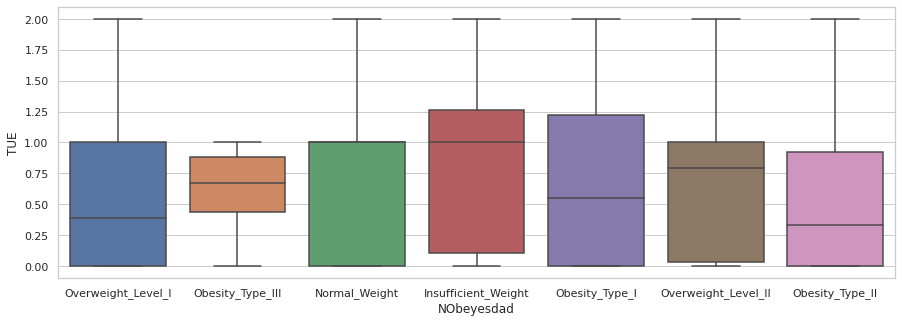

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="NObeyesdad",y="TUE",data=train)

We can see there is no correlation between those features. The time using technology devices is not relevant to predict the obesity of a person. We can choose to drop this feature.

In [ ]:
table=pd.crosstab(train["NObeyesdad"],train["TUE"])
print("Feature 'TUE'")
print(chi2_contingency(table)[0:2])
print('-'*40)

Feature 'TUE'
(4950.637162850815, 0.007239028160855176)
----------------------------------------


In [ ]:
train=train.drop(columns=["TUE"])
test=test.drop(columns=["TUE"])

## **Modelization**

In [ ]:
train.head()

,Gender,Age,family_history_with_overweight,NCP,CAEC,CH2O,NObeyesdad,BMI,FCVC_1,Bad_consumption_habits,MTRANS+FAF
828,Female,21.987341,yes,1.000000,Sometimes,2.000000,Overweight_Level_I,26.241409,1,2,2
1813,Female,21.012450,yes,3.000000,Sometimes,1.705218,Obesity_Type_III,41.870693,2,2,1
180,Female,18.000000,no,3.000000,Sometimes,2.000000,Normal_Weight,19.227688,1,1,1
692,Male,18.000000,yes,3.000000,Sometimes,1.873004,Insufficient_Weight,16.375631,2,2,1
572,Female,19.084967,no,3.725797,Sometimes,1.191401,Insufficient_Weight,15.859296,2,2,2


In [ ]:
test.head()

,Gender,Age,family_history_with_overweight,NCP,CAEC,CH2O,NObeyesdad,BMI,FCVC_1,Bad_consumption_habits,MTRANS+FAF
82,Male,23.000000,yes,3.0,Always,2.000000,Obesity_Type_I,30.657248,1,1,1
1941,Female,26.000000,yes,3.0,Sometimes,2.618198,Obesity_Type_III,42.269664,2,2,1
1669,Male,25.136116,yes,3.0,Sometimes,2.013205,Obesity_Type_II,36.337665,0,2,1
1528,Male,24.739421,yes,3.0,Sometimes,2.000000,Obesity_Type_II,37.993897,0,2,1
746,Male,21.125836,no,1.0,no,2.115967,Overweight_Level_I,26.087062,1,2,1


### **Pre-processing :**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler

from sklearn.feature_selection import RFECV,SelectKBest,chi2

from sklearn.model_selection import GridSearchCV,cross_validate

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,f1_score,make_scorer

from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier

from sklearn.datasets import make_classification

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline


In [ ]:
ordinalencoder=OrdinalEncoder(categories=[["no","yes"],
                                          ["Female","Male"],
                                          ["no","Sometimes","Frequently","Always"]])

train[["family_history_with_overweight","Gender","CAEC"]]=ordinalencoder.fit_transform(train[["family_history_with_overweight","Gender","CAEC"]])
test[["family_history_with_overweight","Gender","CAEC"]]=ordinalencoder.fit_transform(test[["family_history_with_overweight","Gender","CAEC"]])

In [ ]:
Y_train=train["NObeyesdad"]
train=train.drop(columns="NObeyesdad")

In [ ]:
Y_test=test["NObeyesdad"]
test=test.drop(columns="NObeyesdad")

## **Discriminant Analysis :**

### **Linear Discriminant Analysis :**

Let's define which scores we are going to use :

In [ ]:
f1=make_scorer(f1_score,average="macro")

####**Singular Value Decompostion Solver :** ##

In [ ]:
lda_svd=LinearDiscriminantAnalysis(solver="svd")
model_lda_1=cross_validate(lda_svd,train,Y_train,scoring={"Accuracy":"accuracy","F1":f1})

In [ ]:
print("Accuracy :")
print(model_lda_1["test_Accuracy"].mean().round(3))
print("-"*40)
print("F1 :")
print(model_lda_1["test_F1"].mean().round(3))

Accuracy :
0.907
----------------------------------------
F1 :
0.903


- Both metrics are pretty good. Could we improve them?

####**Others Solvers :** ####

In [ ]:
lda=LinearDiscriminantAnalysis()
model_lda_2=GridSearchCV(lda,{"solver":["lsqr", "eigen"],"shrinkage":[None,"auto"]},
                    scoring={"Accuracy":"accuracy","F1":f1},refit='Accuracy')
model_lda_2.fit(train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'shrinkage': [None, 'auto'],
                         'solver': ['lsqr', 'eigen']},
             pre_dispatch='2*n_jobs', refit='Accuracy',
             return_train_score=False,
             scoring={'Accuracy': 'accuracy',
                      'F1': make_scorer(f1_score, average=macro)},
             verbose=0)

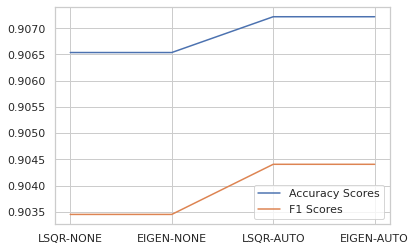

In [ ]:
acc_scores=model_lda_2.cv_results_["mean_test_Accuracy"]
f1_scores=model_lda_2.cv_results_["mean_test_F1"]
x=["LSQR-NONE","EIGEN-NONE","LSQR-AUTO","EIGEN-AUTO"]

plt.plot(x,acc_scores,label="Accuracy Scores")
plt.plot(x,f1_scores,label="F1 Scores")
plt.legend()
plt.show()

- Best score for both metrics occured when using the "LSQR" solver or the "EIGEN" solver. 
- These scores are higher than the scores obtained with the "SVD" solver.

**Conclusion :**
- We do not retain the "SVD" solver.

Let's try to improve our model by deleting some unecessary features.

In [ ]:
selector=RFECV(model_lda_2.best_estimator_)
selector.fit(train,Y_train)
selector.ranking_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

**Conclusion :**
- It is better to delete the second features which is "Age".
- We keep the solver "LSQR" and the shrinkage auto.

####**Final LDA Model :** ####


In [ ]:
train_1=selector.transform(train)
test_1=selector.transform(test)

In [ ]:
final_lda=LinearDiscriminantAnalysis(solver="lsqr",shrinkage="auto")
final_lda.fit(train_1,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)

#### **Evaluation :**

In the discriminant analysis, the features must follow a normal distribution. We will not test this assumption because according to the central limit theorem they do.

In [ ]:
final_lda.score(test_1,Y_test)

0.9069400630914827

In [ ]:
predictions_lda=final_lda.predict(test_1)
f1_score(Y_test,predictions_lda,average="macro")

0.8995987289704724

- The accuracy is about 90% and the f1 is about 90%.

<Figure size 576x576 with 0 Axes>

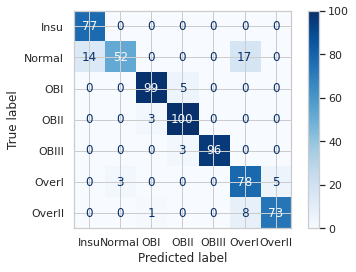

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(final_lda,test_1,Y_test,cmap=plt.cm.Blues,
                      display_labels=["Insu","Normal","OBI","OBII","OBIII","OverI","OverII"],
                      values_format=".3g")

This model encountered difficulties in the identification of the right category between:
- "Normal" and "Overweight_I".
- "Overweight_I" and "Overweight_II".
- "Normal" and "Insufficient Weight".

### **Quadratic Discriminant Analysis :**

In [ ]:
qda=QuadraticDiscriminantAnalysis()
model_qda=cross_validate(qda,train,Y_train,scoring={"Accuracy":"accuracy","F1":f1})

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/l

It seems we have some collinearity. Let's check that.

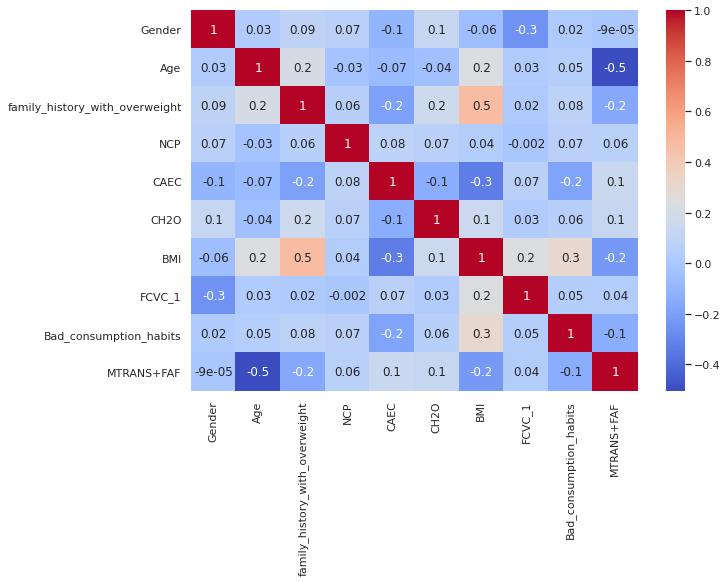

In [ ]:
corr=train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt='.1g',cmap= 'coolwarm')
plt.show()

The features "Age" and "MTRANS+FAF" is quite correlated. Same for the features "BMI" and "family_history_with_overweight".

Let's try to improve our model by deleting some unecessary features.

In [ ]:
scores=pd.DataFrame(index=["Accuracy","F1"],columns=range(1,10))
trains=[]

for k in range(1,10):
  train_new = SelectKBest(chi2, k).fit_transform(train, Y_train)
  trains.append(train_new)
  model_qda_k=cross_validate(QuadraticDiscriminantAnalysis(),train_new,Y_train,scoring={"Accuracy":"accuracy","F1":f1})
  scores.loc["Accuracy",k]=model_qda_k["test_Accuracy"].mean()
  print(model_qda_k["test_Accuracy"])
  scores.loc["F1",k]=model_qda_k["test_F1"].mean()



[0.93581081 0.92567568 0.9559322  0.90508475 0.95932203]
[0.92567568 0.92567568 0.94576271 0.9220339  0.93898305]
[0.15202703 0.93581081 0.12881356 0.94237288 0.94915254]
[0.13175676 0.15202703 0.12881356 0.13220339 0.13220339]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)

[0.15202703 0.15202703 0.12881356 0.15254237 0.15254237]
[0.15202703 0.15202703 0.12881356 0.15254237 0.15254237]
[0.15202703 0.15202703 0.12881356 0.15254237 0.15254237]
[0.15202703 0.68243243 0.12881356 0.65762712 0.15254237]
[0.15202703 0.66554054 0.12881356 0.70169492 0.15254237]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)

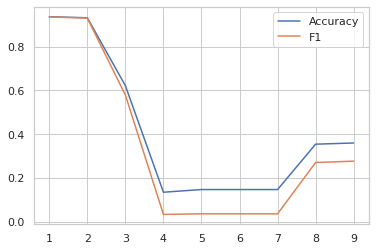

In [ ]:
plt.plot(range(1,10),scores.iloc[0,])
plt.plot(range(1,10),scores.iloc[1,])
plt.legend(labels=["Accuracy","F1"])
plt.show()

- Both metrics are good when the number of features is 1 or 2. 

In [ ]:
print("Accuracy when there is 1 feature :")
print(scores.iloc[0,0])
print('-'*40)
print("F1 when there is 1 feature :")
print(scores.iloc[1,0])
print('-'*40)
print(trains[0].mean())
print(train[["BMI"]].mean())

Accuracy when there is 1 feature :
0.9363650939074668
----------------------------------------
F1 when there is 1 feature :
0.9354575039813608
----------------------------------------
29.54082024194041
BMI    29.54082
dtype: float64


- The best feature is "BMI", it was a good to create this feature.
- When "BMI" is the only feature selected, the accuracy is about 93.6% and the F1 is about 93.5%.

In [ ]:
print("Accuracy when there is 1 feature :")
print(scores.iloc[0,1])
print('-'*40)
print("F1 when there is 1 feature :")
print(scores.iloc[1,1])
print('-'*40)
print(trains[1][:,0].mean())
print(trains[1][:,1].mean())
print(train[["Age"]].mean())
print(train[["BMI"]].mean())

Accuracy when there is 1 feature :
0.93162620247366
----------------------------------------
F1 when there is 1 feature :
0.9301242624912192
----------------------------------------
24.263568636425184
29.54082024194041
Age    24.263569
dtype: float64
BMI    29.54082
dtype: float64


- The two best features is "BMI" and "Age".
- When "BMI" and "Age" are the only features selected, the accuracy is about 93.2% and the F1 is about 93.0%.

#### **Conclusions :**
- We retain to train our model with only the feature "BMI".

#### **Evaluation :**

In the discriminant analysis, the features must follow a normal distribution. We will not test this assumption because according to the central limit theorem they do.

In [ ]:
qda.fit(trains[0],Y_train)
qda.score(test[["BMI"]],Y_test)

0.9337539432176656

In [ ]:
predictions_qda=qda.predict(test[["BMI"]])
f1_score(Y_test,predictions_qda,average="macro")

0.9331872763001948

- Both metrics are about 93.3% which is much better than the scores we obtained with the linear discriminant analysis.

<Figure size 576x576 with 0 Axes>

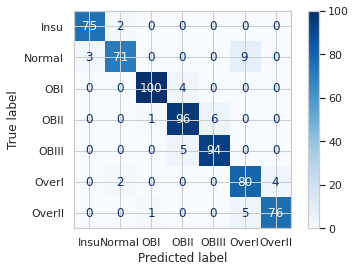

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(qda,test[["BMI"]],Y_test,cmap=plt.cm.Blues,
                      display_labels=["Insu","Normal","OBI","OBII","OBIII","OverI","OverII"],
                      values_format=".3g")

- The quadratic model is much better than the linear one.
- The problems encountered by the linear model are partially fixed with the quadratic model. 
- The linear model was more able to correctly identify the categories "Obesity_Level_II" and "Obesity_Level_III".

### **Naive Bayes :**

In [ ]:
gnb = GaussianNB()
gnb.fit(train,Y_train)

0.8675078864353313

In [ ]:
gnb.predict(test)
gnb.score(test,Y_test)

0.8675078864353313

Can we improve this result with a Cross Validation ?

<Figure size 576x576 with 0 Axes>

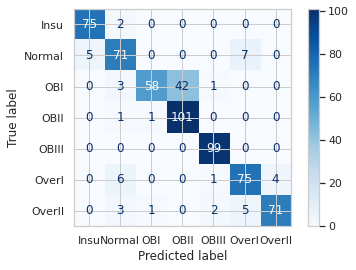

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(gnb,test,Y_test,cmap=plt.cm.Blues,
                      display_labels=["Insu","Normal","OBI","OBII","OBIII","OverI","OverII"],
                      values_format=".3g")

In [ ]:
CVNBG = cross_validate(gnb,train,Y_train,scoring={"Accuracy":"accuracy","F1":f1})

In [ ]:
print("Accuracy :")
print(CVNBG["test_Accuracy"].mean().round(3))
print("-"*40)
print("F1 :")
print(CVNBG["test_F1"].mean().round(3))

Accuracy :
0.869
----------------------------------------
F1 :
0.869


In [ ]:
plt.plot(range(0,30),model_RF.cv_results_["mean_test_Accuracy"])
plt.plot(range(0,30),model_RF.cv_results_["mean_test_F1"])
plt.legend(labels=["Accuracy","F1"])
plt.figure(figsize=(7,7))
plt.show()

The cros validation gives a better precision, but this is not enought precise.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernoulli_nb =  BernoulliNB()
bernoulli_nb.fit(train, Y_train)
bernoulli_nb.score(test,Y_test)

0.4605678233438486

In [ ]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()
complement_nb.fit(train, Y_train)
complement_nb.score(test,Y_test)

0.4116719242902208

## **Classification Tree :**

### **Random Forest :**

We choose "max_features" between 2 and 5 because for classification it is usually equals to sqrt(p)=sqrt(10)=3.2.

In [ ]:
model_RF=GridSearchCV(RandomForestClassifier(random_state=55),{"n_estimators":range(100,600,100),
                                                                  "max_features": range(2,5,1),
                                                                  "criterion":["gini","entropy"],
                                                                  "oob_score":[True]},
                      scoring={"Accuracy":"accuracy","F1":f1},refit='Accuracy')
model_RF.fit(train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=55,
                               

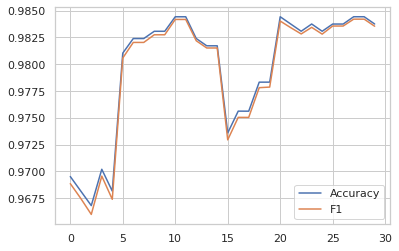

<Figure size 504x504 with 0 Axes>

In [ ]:
plt.plot(range(0,30),model_RF.cv_results_["mean_test_Accuracy"])
plt.plot(range(0,30),model_RF.cv_results_["mean_test_F1"])
plt.legend(labels=["Accuracy","F1"])
plt.figure(figsize=(7,7))
plt.show()

- The first models have a low accuray score.
- The models 10,11 and 20 are among the best.

In [ ]:
print(model_RF.cv_results_["params"][10])
print(model_RF.cv_results_["params"][11])
print(model_RF.cv_results_["params"][20])

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 100, 'oob_score': True}
{'criterion': 'gini', 'max_features': 4, 'n_estimators': 200, 'oob_score': True}
{'criterion': 'entropy', 'max_features': 3, 'n_estimators': 100, 'oob_score': True}


The models 10 and 11 :
- used gini to measure the quality of the split.
- set the "max_features" parameter at 4. 
The models 10 and 11 :
- used the entropy to measure the quality of the split.
- set the "max_features" parameter at 3. 

In [ ]:
print(model_RF.best_params_)
print('-'*40)
print("Accuracy :")
print(model_RF.best_score_)

{'criterion': 'entropy', 'max_features': 3, 'n_estimators': 100, 'oob_score': True}
----------------------------------------
Accuracy :
0.9844296839212093


The best model have an accuray score on the validation test of 0.984. 

---



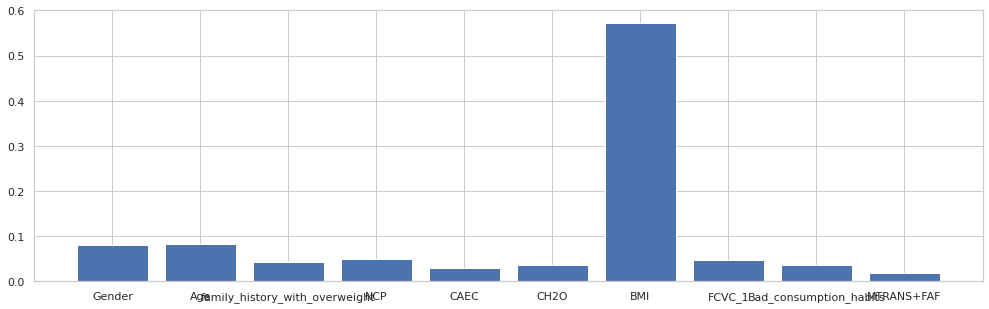

In [ ]:
plt.figure(figsize=(17,5))
plt.bar(train.columns.values,model_RF.best_estimator_.feature_importances_)
plt.show()

- The "BMI" feature is undeniably the most important feature. It the same conclusion that we obtained with the quadratic discriminant analysis.
- The features "Gender" and "Age" are less important than the "BMI" feature but more important than the others.

#### **Evaluation :**

In [ ]:
model_RF.best_estimator_.score(test,Y_test)

0.9779179810725552

In [ ]:
predictions_RF=model_RF.best_estimator_.predict(test)
f1_score(Y_test,predictions_RF,average="macro")

0.9770556703266698

- Both metrics are about 98% which is much better than the scores we obtained with the discriminant analysis.

<Figure size 576x576 with 0 Axes>

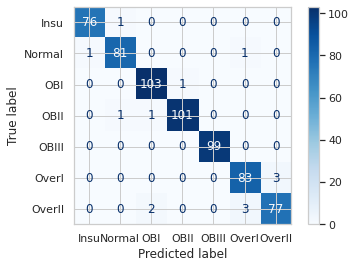

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(model_RF.best_estimator_,test,Y_test,cmap=plt.cm.Blues,
                      display_labels=["Insu","Normal","OBI","OBII","OBIII","OverI","OverII"],
                      values_format=".3g")

- This model is much performant than the previous ones.
- Most of the problems encountered by the discriminant analysis models are fixed.
- It is not perfectly able to identify the right category between "Overweight_I" and "Overweight_II".

### **Bagging Classifier :**

In [ ]:
model_Bagging=GridSearchCV(BaggingClassifier(random_state=55),{"n_estimators":range(100,600,100),
                                                                  "max_features":range(1,11,1),
                                                                  "oob_score":[True]},
                      scoring={"Accuracy":"accuracy","F1":f1},refit='Accuracy')
model_Bagging.fit(train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=55,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': range(1, 11),
                         'n_estimators': range(100, 600, 100),
                         'oob_score': [True]},
             pre_dispatch='2*n_jobs', refit='Accuracy',
             return_train_score=False,
             scoring={'Accuracy': 'accuracy',
                      'F1': make_scorer(f1_score, average=macro)},
             verbose=0)

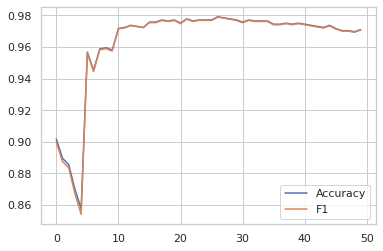

<Figure size 504x504 with 0 Axes>

In [ ]:
plt.plot(range(0,50),model_Bagging.cv_results_["mean_test_Accuracy"])
plt.plot(range(0,50),model_Bagging.cv_results_["mean_test_F1"])
plt.legend(labels=["Accuracy","F1"])
plt.figure(figsize=(7,7))
plt.show()

In [ ]:
model_Bagging.best_score_

0.9790174072377462

The best model have an accuray score on the validation test of 0.979.

In [ ]:
model_Bagging.best_params_

{'max_features': 6, 'n_estimators': 200, 'oob_score': True}

#### **Evaluation :**

In [ ]:
model_Bagging.best_estimator_.score(test,Y_test)

0.9794952681388013

In [ ]:
predictions_Bagging=model_Bagging.best_estimator_.predict(test)
f1_score(Y_test,predictions_Bagging,average="macro")

0.9784356117858078


Both metrics are about 97.8% which is the best result obtained

<Figure size 576x576 with 0 Axes>

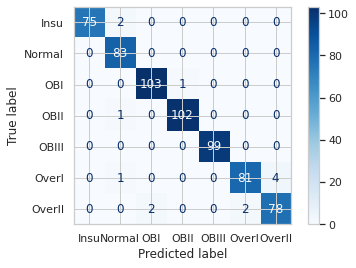

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(model_Bagging.best_estimator_,test,Y_test,cmap=plt.cm.Blues,
                      display_labels=["Insu","Normal","OBI","OBII","OBIII","OverI","OverII"],
                      values_format=".3g")

This model is quite performant. We can observe some error for OVerII and OverI.

We retain this model.

In [ ]:
import os
import joblib

In [ ]:
joblib.dump(model_RF.best_estimator_,'tree.save')
files.download('tree.save')

### **AdaBoost Classifier :**

We choose a learning between 0.5 and 2 because the default value is 1.

In [ ]:
model_boost=GridSearchCV(AdaBoostClassifier(random_state=55),param_grid={"n_estimators":range(100,800,100),
                                                                                  "learning_rate":np.linspace(1,2,10)},
                         scoring={"Accuracy":"accuracy","F1":f1},refit='Accuracy')
model_boost.fit(train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=55),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ]),
                         'n_estimators': range(100, 800, 100)},
             pre_dispatch='2*n_jobs', refit='Accuracy',
             return_train_score=False,
             scoring={'Accuracy': 'accuracy',
                      'F1': make_scorer(f1_score, average=macro)},
             verbose=0)

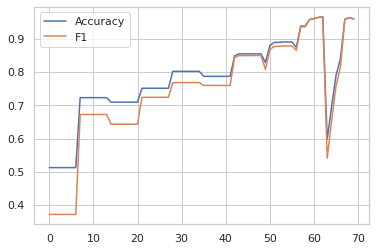

<Figure size 504x504 with 0 Axes>

In [ ]:
plt.plot(range(0,70),model_boost.cv_results_["mean_test_Accuracy"])
plt.plot(range(0,70),model_boost.cv_results_["mean_test_F1"])
plt.legend(labels=["Accuracy","F1"])
plt.figure(figsize=(7,7))
plt.show()

The models 59,60,61,62 are among the best models.

In [ ]:
model_boost.cv_results_["params"][59:63]

[{'learning_rate': 1.8888888888888888, 'n_estimators': 400},
 {'learning_rate': 1.8888888888888888, 'n_estimators': 500},
 {'learning_rate': 1.8888888888888888, 'n_estimators': 600},
 {'learning_rate': 1.8888888888888888, 'n_estimators': 700}]

These models use a learning rate superior of 1.89 and a number of estimators superiour to 400.

In [ ]:
print(model_boost.best_params_)
print('-'*40)
print("Accuracy :")
print(model_boost.best_score_)

{'learning_rate': 1.8888888888888888, 'n_estimators': 600}
----------------------------------------
Accuracy :
0.9647984425103069


The best model uses a learning rate of 1.83 and a number of estimators of 600. The accuracy score on the validation set is 96.5 which is lower than the one obtained with the Random Forest.

In [ ]:
print("Accuracy")
print(model_boost.best_estimator_.score(test,Y_test))
print('-'*40)
print("F1 score")
predictions_ADA=model_boost.best_estimator_.predict(test)
f1_score(Y_test,predictions_ADA,average="macro")

Accuracy
0.9700315457413249
----------------------------------------
F1 score


0.9688717742274348

The accuracy score and the F1 score are lower than those obtained with the Random Forest. There is no need for a further analysis because we will not retain this model.

## **K-Nearest Neighbors :**

As we know, this method works poorly in high dimensions, this is because of the curse of dimensionality. Indeed in high dimensions, measure of distance such as the euclidean distance are meaningless. 

This method is scale sensitive so, we need to scale our data.

In [ ]:
pipeline=Pipeline([
                   ('pca',PCA()),
                   ('scale',StandardScaler()),
                   ('KNN',KNeighborsClassifier())
])

parameters={}
parameters["pca__n_components"]=range(2,6)
parameters["KNN__n_neighbors"]=range(2,10)
parameters["KNN__weights"]=["uniform","distance"]
parameters["KNN__p"]=[2]

model_KNN=GridSearchCV(pipeline,parameters,scoring={"Accuracy":"accuracy","F1":f1},refit='Accuracy')

model_KNN.fit(train,Y_train)

0.9495268138801262

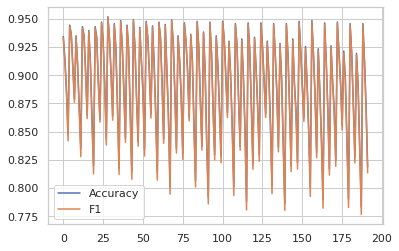

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.plot(range(0,192),model_KNN.cv_results_["mean_test_Accuracy"])
plt.plot(range(0,192),model_KNN.cv_results_["mean_test_F1"])
plt.legend(labels=["Accuracy","F1"])
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
model_KNN.best_estimator_

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=1,
                                      weights='distance'))],
         verbose=False)

The best estimator is obtained when the number of components of the PCA is 2. We are in two dimensions so the euclidean distance or the manhattan distance can be used without doubt.

In [ ]:
model_KNN.best_score_

0.9519331195602382

The accuracy score on the validation set is 95.2%.

In [ ]:
model_KNN.score(test,Y_test)

0.9479495268138801

The accuracy score is lower than the one obtained with the Random Forest. There is no need for a further analysis because we will not retain this model.

## **Neural Network Classifier :**

### **MLPClassifier() :**

In [ ]:
clf = MLPClassifier(random_state=55, max_iter=10000)
clf.fit(train, Y_train)
clf.predict(test)
clf.score(test, Y_test)

0.8832807570977917

In [ ]:
mlp_gs = MLPClassifier(random_state=55, max_iter=150)
parameter_space = {
    'hidden_layer_sizes': [range(100,700,100),(100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring={"Accuracy":"accuracy","F1":f1},refit='Accuracy')
clf.fit(train, Y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=150, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [ra

In [ ]:
clf.best_score_

0.9045625286303253

In [ ]:
clf.score(test,Y_test)

0.889589905362776

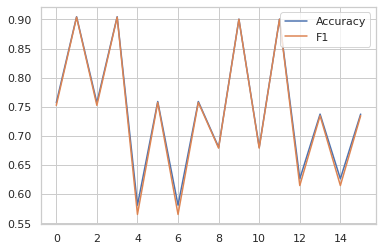

<Figure size 504x504 with 0 Axes>

In [ ]:
plt.plot(range(0,16),clf.cv_results_["mean_test_Accuracy"])
plt.plot(range(0,16),clf.cv_results_["mean_test_F1"])
plt.legend(labels=["Accuracy","F1"])
plt.figure(figsize=(7,7))
plt.show()

<Figure size 576x576 with 0 Axes>

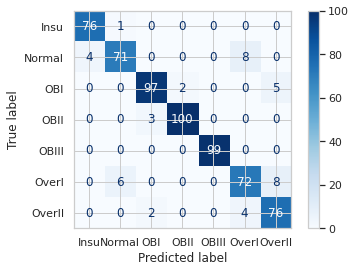

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(clf,test,Y_test,cmap=plt.cm.Blues,
                      display_labels=["Insu","Normal","OBI","OBII","OBIII","OverI","OverII"],
                      values_format=".3g")

In [ ]:
clf.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': range(100, 700, 100),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train, Y_train) 
clf.score(test,Y_test)

0.8943217665615142